# Task-03

## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## Linkedin Link-
[Connect with me on LinkedIn](https://www.linkedin.com/in/manishmalik554)

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

### Load the Dataset

In [2]:
bank_data = pd.read_csv(r'E:\Prodigy Projects Dataset\PRODIGY_DS_03\bank-full.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.shape

(45211, 17)

In [82]:
# we will take sample and work on the sample dataset of this bank_data
bank = bank_data.sample(10000, random_state = 77)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26846,56,technician,single,secondary,no,1437,yes,no,cellular,20,nov,367,8,-1,0,unknown,no
3661,31,admin.,single,secondary,no,0,yes,no,unknown,16,may,28,4,-1,0,unknown,no
17740,40,management,married,unknown,no,6,yes,no,cellular,29,jul,64,4,-1,0,unknown,no
2002,35,management,single,tertiary,no,123,yes,no,unknown,9,may,83,3,-1,0,unknown,no
10083,40,admin.,divorced,secondary,no,1967,yes,no,unknown,11,jun,363,1,-1,0,unknown,no


In [5]:
bank.shape

(10000, 17)

In [6]:
# checking the missing values, we have no missing values in this sample dataset
bank.isnull().sum()  

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# we will check the datatype of each column
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 26846 to 30107
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10000 non-null  int64 
 1   job        10000 non-null  object
 2   marital    10000 non-null  object
 3   education  10000 non-null  object
 4   default    10000 non-null  object
 5   balance    10000 non-null  int64 
 6   housing    10000 non-null  object
 7   loan       10000 non-null  object
 8   contact    10000 non-null  object
 9   day        10000 non-null  int64 
 10  month      10000 non-null  object
 11  duration   10000 non-null  int64 
 12  campaign   10000 non-null  int64 
 13  pdays      10000 non-null  int64 
 14  previous   10000 non-null  int64 
 15  poutcome   10000 non-null  object
 16  y          10000 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## EDA 

In [8]:
### Checking the value counts and number of unique values each column contains 

In [9]:
#creating a function to check the unique values in the feasible columns 
def unique_values(data, col):     
    x = data[col].value_counts()
    unique_value = data[col].nunique()
    print(f'number of unique values for "{col}" is {unique_value}.')
    print(f'value_counts of "{col}" are:\n{x}')
    print('\n')

In [10]:
bank['pdays'].value_counts()

pdays
-1      8172
 92       31
 182      30
 183      26
 181      24
        ... 
 235       1
 31        1
 372       1
 40        1
 232       1
Name: count, Length: 376, dtype: int64

In [11]:
# selecting only object datatypes for the EDA
obj_data = bank.select_dtypes(include = ['object'])
obj_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
26846,technician,single,secondary,no,yes,no,cellular,nov,unknown,no
3661,admin.,single,secondary,no,yes,no,unknown,may,unknown,no
17740,management,married,unknown,no,yes,no,cellular,jul,unknown,no
2002,management,single,tertiary,no,yes,no,unknown,may,unknown,no
10083,admin.,divorced,secondary,no,yes,no,unknown,jun,unknown,no


In [12]:
obj_data_col = list(obj_data.columns)
obj_data_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
for feature in obj_data_col:
    unique_values(bank, feature)

number of unique values for "job" is 12.
value_counts of "job" are:
job
blue-collar      2103
management       2096
technician       1648
admin.           1194
services          912
retired           481
self-employed     375
entrepreneur      339
unemployed        283
housemaid         282
student           217
unknown            70
Name: count, dtype: int64


number of unique values for "marital" is 3.
value_counts of "marital" are:
marital
married     6044
single      2828
divorced    1128
Name: count, dtype: int64


number of unique values for "education" is 4.
value_counts of "education" are:
education
secondary    5153
tertiary     2943
primary      1515
unknown       389
Name: count, dtype: int64


number of unique values for "default" is 2.
value_counts of "default" are:
default
no     9831
yes     169
Name: count, dtype: int64


number of unique values for "housing" is 2.
value_counts of "housing" are:
housing
yes    5523
no     4477
Name: count, dtype: int64


number of uniqu

In [14]:
# we will reduce the categories in the column 'job'
bank["job"]=bank["job"].replace(["management", "admin."], "White-collar")
bank["job"]=bank["job"].replace(["services", "housemaid"], "Pink-collar")
bank["job"]=bank["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")
bank["job"]=bank["job"].replace(["self-employed", "entrepreneur"], "self-depend")

In [15]:
bank['job'].value_counts()

job
White-collar    3290
blue-collar     2103
technician      1648
Pink-collar     1194
Others          1051
self-depend      714
Name: count, dtype: int64

In [16]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26846,56,technician,single,secondary,no,1437,yes,no,cellular,20,nov,367,8,-1,0,unknown,no
3661,31,White-collar,single,secondary,no,0,yes,no,unknown,16,may,28,4,-1,0,unknown,no


In [17]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
col = ['age', 'balance', 'duration', 'campaign']
bank[col].describe(percentiles = [0.01, 0.02, 0.03, .1, .3, .5, .8, .9, .98, .99]).T

,count,mean,std,min,1%,2%,3%,10%,30%,50%,80%,90%,98%,99%,max
age,10000.0,40.8487,10.508751,18.0,23.00,25.00,26.0,29.0,34.0,39.0,51.0,56.0,62.00,70.00,93.0
balance,10000.0,1313.8934,2772.819577,-3372.0,-637.04,-440.06,-324.0,0.0,136.7,456.5,1815.0,3426.1,8991.22,12917.11,64343.0
duration,10000.0,258.0784,260.454182,2.0,12.00,17.00,22.0,60.0,117.0,178.0,368.0,541.0,1077.02,1297.06,3785.0
campaign,10000.0,2.7273,2.933223,1.0,1.00,1.00,1.0,1.0,1.0,2.0,4.0,5.0,11.00,16.00,63.0


In [19]:
#checking the correlation between the bivariates

# If p is low ; null will go  (<0.05 )
# if p is high ; null will fly
# Chi2 : Null Hypothesis : There is no relationship between Var
#         Alter Hypothesis : There is a relationship between Var

crs_tab1 = pd.crosstab(bank['y'], bank['contact'])
from scipy import stats
stats.chi2_contingency(crs_tab1)
# it means there is a relation between 'contact' and 'y' target variable

Chi2ContingencyResult(statistic=248.99624545179304, pvalue=8.533993207025566e-55, dof=2, expected_freq=array([[5766.6791,  562.2799, 2498.041 ],
       [ 766.3209,   74.7201,  331.959 ]]))

In [20]:
crs_tab2 = pd.crosstab(bank['y'], bank['month'])
stats.chi2_contingency(crs_tab2)
# 'month' and 'y' are correlated 

Chi2ContingencyResult(statistic=841.5189499326739, pvalue=2.2931695449508316e-173, dof=11, expected_freq=array([[ 581.6993, 1229.6011,   44.135 ,  544.6259,  285.9948, 1344.3521,
        1069.8324,   99.7451, 2603.965 ,  786.4857,  140.3493,   96.2143],
       [  77.3007,  163.3989,    5.865 ,   72.3741,   38.0052,  178.6479,
         142.1676,   13.2549,  346.035 ,  104.5143,   18.6507,   12.7857]]))

In [21]:
crs_tab3 = pd.crosstab(bank['y'], bank['poutcome'])
stats.chi2_contingency(crs_tab3)
# 'poutcome' and 'y' target variable are correlated 

Chi2ContingencyResult(statistic=897.6482276933361, pvalue=2.865102538361706e-194, dof=3, expected_freq=array([[ 935.662 ,  385.7399,  291.291 , 7214.3071],
       [ 124.338 ,   51.2601,   38.709 ,  958.6929]]))

In [22]:
crs_tab4 = pd.crosstab(bank['y'], bank['education'])
stats.chi2_contingency(crs_tab4)
# "education" and 'y' target variable are correlated

Chi2ContingencyResult(statistic=56.82134157099188, pvalue=2.8057512233994525e-12, dof=3, expected_freq=array([[1337.2905, 4548.5531, 2597.7861,  343.3703],
       [ 177.7095,  604.4469,  345.2139,   45.6297]]))

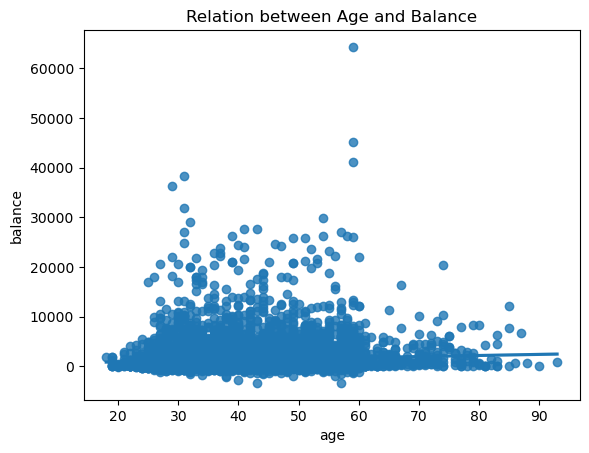

In [23]:
sns.regplot(data = bank, x = 'age', y = 'balance')
plt.title('Relation between Age and Balance')
plt.show()

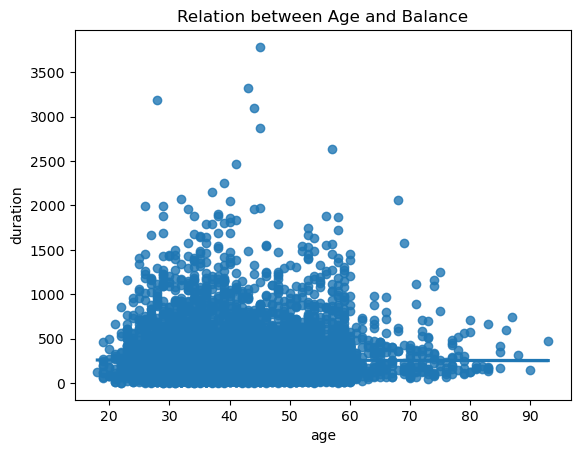

In [24]:
sns.regplot(data = bank, x = 'age', y = 'duration')
plt.title('Relation between Age and Balance')
plt.show()

In [25]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Feature Engineering 

In [26]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26846,56,technician,single,secondary,no,1437,yes,no,cellular,20,nov,367,8,-1,0,unknown,no
3661,31,White-collar,single,secondary,no,0,yes,no,unknown,16,may,28,4,-1,0,unknown,no


In [27]:
# we will convert the target variable into "int" datatype 
bank['y'] = bank['y'].replace({'no': 0, 'yes': 1}) # we replaced the "no" with '0' and "yes" with '1'

C:\Users\manis\AppData\Local\Temp\ipykernel_11088\1013378653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank['y'] = bank['y'].replace({'no': 0, 'yes': 1}) # we replaced the "no" with '0' and "yes" with '1'


In [28]:
bank['y'].value_counts()

y
0    8827
1    1173
Name: count, dtype: int64

In [29]:
bank['poutcome'] = bank['poutcome'].replace(['unknown', 'other'], 'others')

In [30]:
bank['poutcome'].value_counts()

poutcome
others     8610
failure    1060
success     330
Name: count, dtype: int64

In [31]:
bank.loc[bank['pdays']==-1, 'pdays'] = 999
bank['recent_pdays'] = 1/bank['pdays']
bank.drop(columns = 'pdays', inplace = True)

In [32]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,recent_pdays
26846,56,technician,single,secondary,no,1437,yes,no,cellular,20,nov,367,8,0,others,0,0.001001
3661,31,White-collar,single,secondary,no,0,yes,no,unknown,16,may,28,4,0,others,0,0.001001


In [33]:
bank.dtypes[bank.dtypes == 'object']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
dtype: object

In [34]:
# we will create dummies for the 'object' datatype features
bank1=pd.get_dummies(bank, columns=["job", "marital","education", "default", "housing","loan", "poutcome", "contact","month"],
              drop_first=True, dtype="int")

In [35]:
bank1.shape

(10000, 36)

In [36]:
bank1.dtypes

age                      int64
balance                  int64
day                      int64
duration                 int64
campaign                 int64
previous                 int64
y                        int64
recent_pdays           float64
job_Pink-collar          int32
job_White-collar         int32
job_blue-collar          int32
job_self-depend          int32
job_technician           int32
marital_married          int32
marital_single           int32
education_secondary      int32
education_tertiary       int32
education_unknown        int32
default_yes              int32
housing_yes              int32
loan_yes                 int32
poutcome_others          int32
poutcome_success         int32
contact_telephone        int32
contact_unknown          int32
month_aug                int32
month_dec                int32
month_feb                int32
month_jan                int32
month_jul                int32
month_jun                int32
month_mar                int32
month_ma

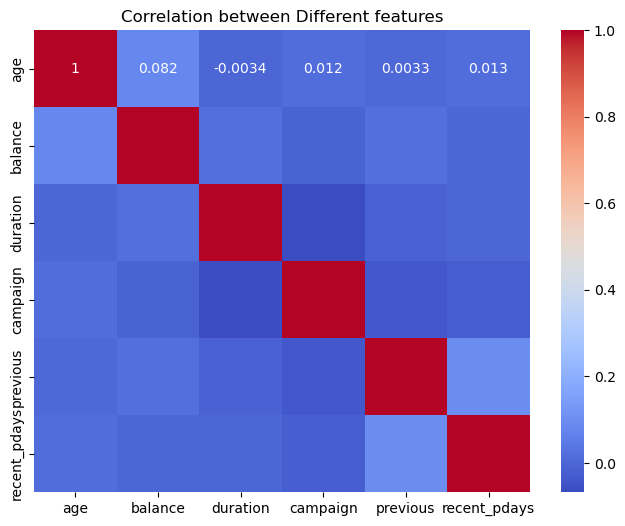

In [38]:
cr=bank[['age','balance', 'duration', 'campaign', 'previous', 'recent_pdays']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr, cmap="coolwarm", annot=True)
plt.title('Correlation between Different features')
plt.show()

## Model Training

In [39]:
# setting the target variable 
x = bank1.drop(columns = 'y')
y = bank1['y']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 77)

In [41]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
#testing the accuracy of model on the train and test dataset
print('Train Score:', dt1.score(x_train, y_train))
print('Test Score:' , dt1.score(x_test, y_test))

Train Score: 1.0
Test Score: 0.867


In [43]:
# randomly deciding parameters and analyzing the result
dt2=DecisionTreeClassifier(max_depth=10, random_state=77, min_samples_split=150, min_samples_leaf=150)
dt2.fit(x_train, y_train)
print("Train score :", dt2.score(x_train, y_train))
print("Test score :", dt2.score(x_test, y_test))

Train score : 0.894875
Test score : 0.888


In [63]:
# now we will run the gridsearch to find the best parameters
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[10,20, 30, 50],
              'max_depth':[5, 7,10, 12],
              "min_samples_leaf":[5,7, 10, 15, 20, 25],
              "max_features":["auto", "log2", "sqrt"]
             }
dt3 = DecisionTreeClassifier(random_state=55)
gsearch = GridSearchCV(estimator=dt3, param_grid=parameters, cv=10,  n_jobs=-1, scoring='recall')

gsearch.fit(x_train, y_train)

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=55),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 7, 10, 12],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [5, 7, 10, 15, 20, 25],
                         'min_samples_split': [10, 20, 30, 50]},
             scoring='recall')

In [64]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [295]:
gsearch.best_score_

0.39019401589527825

In [65]:
dt3=DecisionTreeClassifier(max_depth=10,
                           criterion="gini",
                           min_samples_split=50,
                            min_samples_leaf= 10,
                          max_features= 'auto')
dt3.fit(x_train, y_train)

print("Train accuracy:", dt3.score(x_train,y_train))

print("Test accuracy:", dt3.score(x_test,y_test))

Train accuracy: 0.901375
Test accuracy: 0.883


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [66]:
x_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'recent_pdays', 'job_Pink-collar', 'job_White-collar',
       'job_blue-collar', 'job_self-depend', 'job_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'poutcome_others', 'poutcome_success', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [67]:
# Checking Importance of variable so we can select best features
dt3.feature_importances_ 

array([7.07159402e-02, 1.20892903e-02, 7.25722734e-03, 4.59946632e-01,
       1.27721311e-02, 5.33529587e-03, 1.10519381e-01, 1.22168472e-03,
       2.05635539e-03, 1.36173219e-03, 0.00000000e+00, 5.56419482e-03,
       9.47894520e-03, 6.55657693e-03, 1.58359742e-04, 3.59752022e-04,
       0.00000000e+00, 0.00000000e+00, 3.94691016e-02, 1.79641422e-02,
       1.23773964e-03, 9.29074088e-02, 5.93291427e-04, 8.91008321e-03,
       1.76610412e-03, 9.15122162e-03, 3.08009620e-05, 1.18660371e-03,
       0.00000000e+00, 0.00000000e+00, 4.37175842e-02, 1.80113828e-02,
       6.91085688e-03, 5.27501797e-02, 0.00000000e+00])

In [68]:
# Filtering out the best features
Feat_imp=pd.DataFrame({"Features":x_train.columns, "imp":dt3.feature_importances_}).sort_values(by=["imp"],ascending=False)
Feat_imp[Feat_imp["imp"]>=0.02]["Features"].values

array(['duration', 'recent_pdays', 'poutcome_success', 'age', 'month_oct',
       'month_mar', 'housing_yes'], dtype=object)

In [70]:
x_train1 = x_train[['duration', 'recent_pdays', 'poutcome_success', 'age', 'month_oct',
       'month_mar', 'housing_yes']]
x_test1 = x_test[['duration', 'recent_pdays', 'poutcome_success', 'age', 'month_oct',
       'month_mar', 'housing_yes']]

In [71]:
dt4=DecisionTreeClassifier(max_depth=10,
                           criterion="gini",
                           min_samples_split=50,
                            min_samples_leaf= 10,
                          max_features= 'auto')
dt4.fit(x_train1, y_train)

print("Train accuracy:", dt4.score(x_train1,y_train))

print("Test accuracy:", dt4.score(x_test1,y_test))

Train accuracy: 0.90575
Test accuracy: 0.8965


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


## Evaluation of Model

In [72]:

pred_train=dt4.predict(x_train1)   
pred_test=dt4.predict(x_test1)

In [73]:
# creating the confusion matrix for the train dataset
pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), index=["Act0", "Act1"], columns=["pred0", "pred1"])

,pred0,pred1
Act0,6856,221
Act1,533,390


In [74]:
# creating the confusion matrix for the test dataset
pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), index=["Act0", "Act1"], columns=["pred0", "pred1"])

,pred0,pred1
Act0,1684,66
Act1,141,109


In [75]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7077
           1       0.64      0.42      0.51       923

    accuracy                           0.91      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.89      0.91      0.90      8000



In [76]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1750
           1       0.62      0.44      0.51       250

    accuracy                           0.90      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.89      0.90      0.89      2000



In [77]:
prob_train=pd.DataFrame(dt4.predict_proba(x_train1), columns=["Prob0", "Prob1"])
prob_train

,Prob0,Prob1
0,0.964888,0.035112
1,0.964888,0.035112
2,0.955684,0.044316
3,0.892473,0.107527
4,0.978081,0.021919
...,...,...
7995,0.955684,0.044316
7996,0.978081,0.021919
7997,0.978081,0.021919
7998,1.000000,0.000000


In [78]:
dt4.predict_proba(x_train1)[:,1] 

array([0.03511236, 0.03511236, 0.04431599, ..., 0.02191943, 0.        ,
       0.        ])

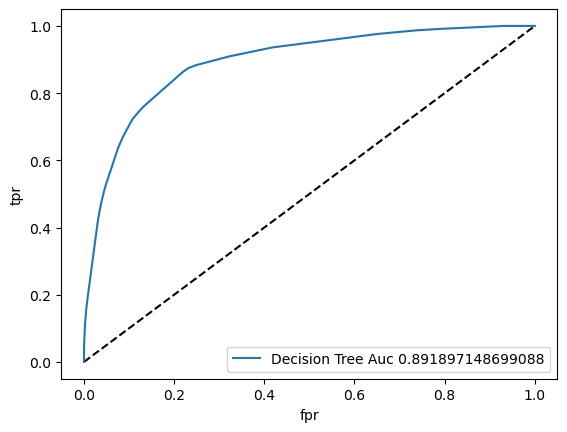

In [79]:
probs=dt4.predict_proba(x_train1)[:,1]
auc=metrics.roc_auc_score(y_train,probs)
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label=f'Decision Tree Auc '+str(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

# Thank You